<a href="https://colab.research.google.com/github/diwandahiya304/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all dependencies


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

Loading of data

In [ ]:
%%time
df=pd.read_csv(r'/IMDB-Dataset.csv',encoding='latin-1')

CPU times: user 5.25 s, sys: 405 ms, total: 5.66 s
Wall time: 5.72 s


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Data cleaning and preprocessing

In [ ]:
#customize stopword as per data
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
new_stopwords=["movie","one","film","would","shall","could","might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)

In [ ]:
#Data cleaning and preprocessing pipeline
#Removing special character
def remove_special_character(content):
  return re.sub('\[[^&@#!]]*\]','',content)

#Removing URL's
def remove_url(content):
  return re.sub(r'http\S+','',content)

#Removing the stopwords from text
def remove_stopwords(content):
  clean_data=[]
  for i in content.split():
    if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
      clean_data.append(i.strip().lower())
  return " ".join(clean_data)

#Expansion of english contractions
def contraction_expansion(content):
  content=re.sub(r"won\'t","would not",content)
  content=re.sub(r"can\'t","can not",content)
  content=re.sub(r"don\'t","do not",content)
  content=re.sub(r"shouldn\'t","should not",content)
  content=re.sub(r"needn\'t","need not",content)
  content=re.sub(r"hasn\'t","has not",content)
  content=re.sub(r"haven\'t","have not",content)
  content=re.sub(r"weren\'t","were not",content)
  content=re.sub(r"mightn\'t","might not",content)
  content=re.sub(r"didn\'t","did not",content)
  content=re.sub(r"n\'t"," not",content)
  content=re.sub(r"\'re"," are",content)
  content=re.sub(r"\'s"," is",content)
  content=re.sub(r"\'d"," would",content)
  content=re.sub(r"\'ll"," will",content)
  content=re.sub(r"\'t"," not",content)
  content=re.sub(r"\'ve"," have",content)
  content=re.sub(r"\'m"," am",content)
  return content

#Data preprocessing
def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)

    content = remove_stopwords(content)
    return content

In [ ]:
%%time
pd.options.display.max_colwidth = 1000
#Data cleaning
df['Reviews_clean']=df['Reviews'].apply(data_cleaning)
df.head(5)

CPU times: user 13.9 s, sys: 4.66 ms, total: 13.9 s
Wall time: 14.5 s


,Ratings,Reviews,Movies,Resenhas,Reviews_clean
0,1.0,watched conditional see films not caught dead giving hard earned money explain depth write shortest not see far unbelievably unfunny ever total since hatred others like extends far beyond think go not know people besides carmen vanessa kim not though think editing flat possibly blatant continuity errors make crapfast even crappier thought know films not supposed serious come someone gets minor facial next someone gets cut blood least cut since narnia films away give disaster pass thoughtless mindless physical gags obviously take popular movies last year late including best picture know saddest thing stupid movies not care much money many cameos sorry ass excuses films taking away jobs directors truly deserve thought better taste ashamed making kind jason friedberg aaron burn guys contributing decline western cause downfall western,Disaster Movie,"* IsenÃ§Ã£o de responsabilidade: eu sÃ³ assisti esse filme como um acordo condicional. E eu vejo filmes de graÃ§a. Eu nÃ£o seria pego morto dando meu dinheiro suado a esses idiotas. Bem, para explicar a profundidade desse 'filme', eu poderia escrever minha crÃ­tica mais curta de todos os tempos. NÃ£o vÃª este filme. Ã de longe o filme mais estÃºpido, lamenta, preguiÃ§oso e inacreditavelmente UNFUNNY que eu jÃ¡ vi. Ã um desastre total. Mas como o meu Ã³dio por este filme e por outros, se estende muito alÃ©m de uma exibiÃ§Ã£o, acho que vou continuar um pouco. NÃ£o conheÃ§o nenhuma das pessoas do filme alÃ©m de Carmen Electra, Vanessa Minnillo, e Kim Kardashian, mas isso nÃ£o importa. Eles sÃ£o todos horrÃ­veis, embora eu ache que esse seja o ponto. A ediÃ§Ã£o Ã© horrÃ­vel e, possivelmente, erros de continuidade flagrantes tornam essa porcaria ainda mais horrÃ­vel do que eu pensava. Agora eu sei que esses filmes nÃ£o devem ser sÃ©rios, mas vamos lÃ¡, Ã© o cinema 101 que se alguÃ©m f...",watched conditional see films not caught dead giving hard earned money explain depth write shortest not see far unbelievably unfunny ever total since hatred others like extends far beyond think go not know people besides carmen vanessa kim not though think editing flat possibly blatant continuity errors make crapfast even crappier thought know films not supposed serious come someone gets minor facial next someone gets cut blood least cut since narnia films away give disaster pass thoughtless mindless physical gags obviously take popular movies last year late including best picture know saddest thing stupid movies not care much money many cameos sorry ass excuses films taking away jobs directors truly deserve thought better taste ashamed making kind jason friedberg aaron burn guys contributing decline western cause downfall western
1,1.0,writing hopes gets put previous review anyone find slop entertaining completely beyond first spoof entitled indeed spoof disaster seen count disaster iron alvin amy hancock register disaster selzterwater failburg shown lack sort writing skill unfortunately tortured date epic know exactly expect jokes bad references cheaply remade scenes someone informed satire copy paste though not say actually seem taken nothing clever witty remotely smart way two not believe people still pay see insult though enjoy films doubt smart enough realize unfortunately not number low enough includes rate deserves top worst films right date epic mean meet rather forced hour hands marathon watch,Disaster Movie,"Estou escrevendo isso na esperanÃ§a de que isso seja colocado sobre a revisÃ£o anterior deste ""filme"". Como alguÃ©m pode achar divertido esse desleixo estÃ¡ completamente alÃ©m de mim. Antes de mais nada, um filme de parÃ³dia intitulado ""Filme de desastre"" deveria ser, de fato, uma parÃ³dia de filmes de desastre. Agora eu jÃ¡ vi 1 (sim, conte-os, 1) filme de desastre sendo falsificado, sendo ""Twister"". Como Juno, Homem de Ferro, Batman, O Hulk, Alvin e os Esquilos, Amy Winehouse ou Hancock se registram como filmes de Desastre? Sel

Data Overview

In [ ]:
#checking for missing values\
df.isna().sum()

Ratings      0
Reviews      0
Movies      25
Resenhas     0
dtype: int64

In [ ]:
df['Ratings'].describe()

count    150000.000000
mean          5.500000
std           2.872291
min           1.000000
25%           3.000000
50%           5.500000
75%           8.000000
max          10.000000
Name: Ratings, dtype: float64

In [ ]:
df['Reviews_clean'].describe()

count     150000
unique    149745
top             
freq          10
Name: Reviews_clean, dtype: object

In [ ]:
print('Unique reviews:%s' % df.Reviews.nunique())
print('Unique movie names:%s' % df.Movies.nunique())
print('No. of ratings:%s'% df.Ratings.count())

Unique reviews:149745
Unique movie names:14206
No. of ratings:150000


Exploratory Data Analysis

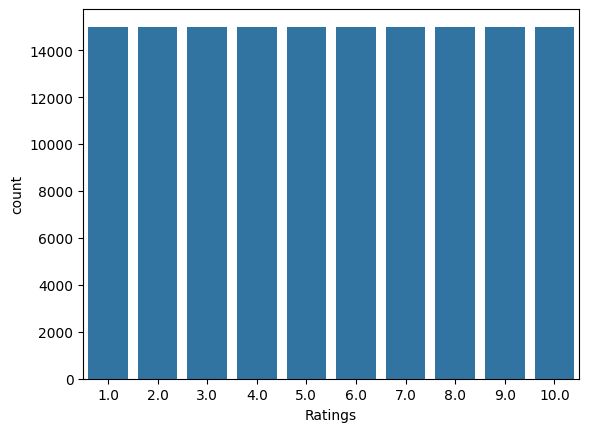

1.0     15000
2.0     15000
4.0     15000
3.0     15000
5.0     15000
6.0     15000
8.0     15000
7.0     15000
10.0    15000
9.0     15000
Name: Ratings, dtype: int64


In [ ]:
#checking for class imbalance
sns.countplot(x=df['Ratings'])
plt.show()
print(df['Ratings'].value_counts())

CPU times: user 43.3 s, sys: 2.16 s, total: 45.4 s
Wall time: 47.1 s


(-0.5, 1499.5, 799.5, -0.5)

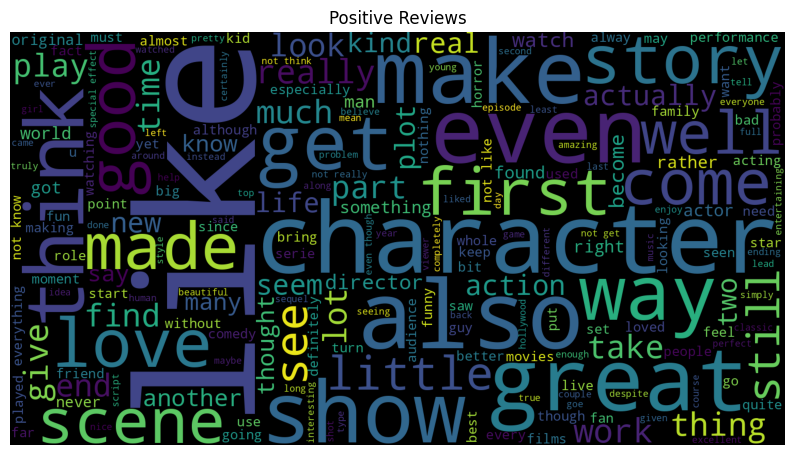

In [ ]:
%%time
#visualization of important words from positive reviews
sentences=df['Reviews']
pos=' '.join(map(str,sentences[df['Ratings']>=7]))
neg=' '.join(map(str,sentences[df['Ratings']<=4]))
pos_wordcloud=WordCloud(width=1500,height=800,background_color='black',stopwords=stop_words,min_font_size=15).generate(pos)
plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Positive Reviews')
plt.axis('off')

CPU times: user 38.1 s, sys: 1.55 s, total: 39.6 s
Wall time: 41.3 s


(-0.5, 1499.5, 799.5, -0.5)

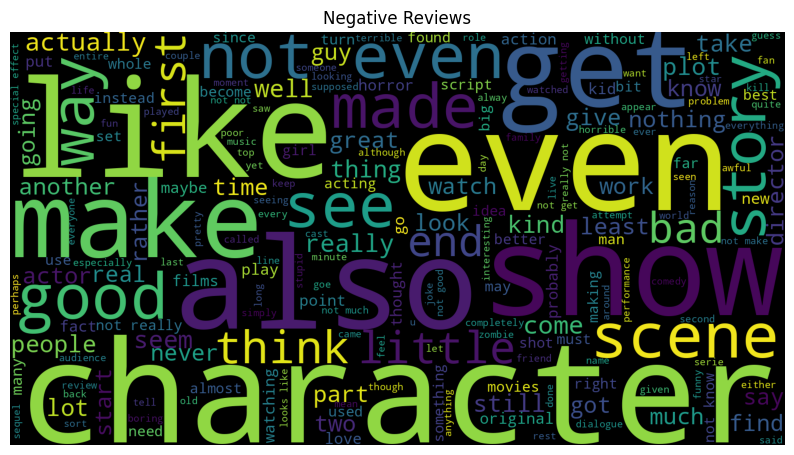

In [ ]:
%%time
#visualization of important words from negative reviews
pos_wordcloud=WordCloud(width=1500,height=800,background_color='black',stopwords=stop_words,min_font_size=15).generate(neg)
plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Negative Reviews')
plt.axis('off')
# plt.show()

Basic Statistic of review data

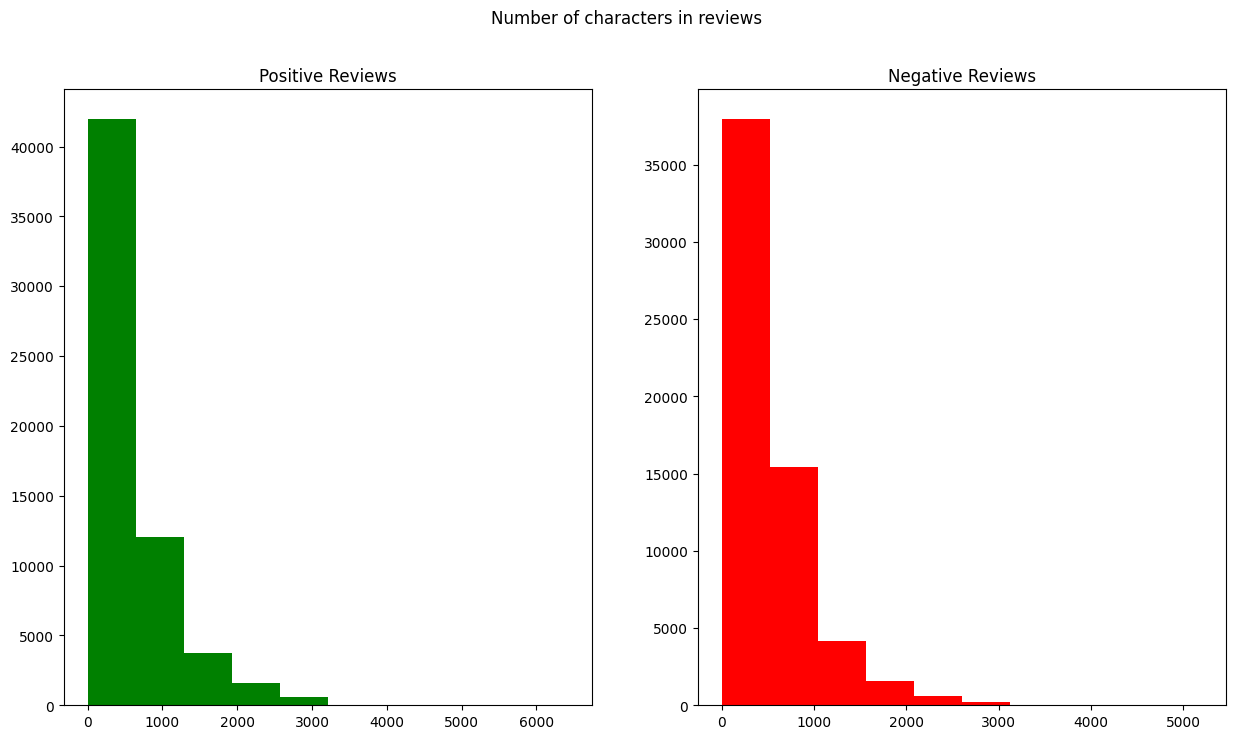

In [ ]:
#visualization of number of characters in reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
len_pos_review=df[df['Ratings']>=7]['Reviews'].str.len()
pos_ax.hist(len_pos_review,color='green')
pos_ax.set_title('Positive Reviews')
len_neg_review=df[df['Ratings']<=4]['Reviews'].str.len()
neg_ax.hist(len_neg_review,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Number of characters in reviews')
plt.show()

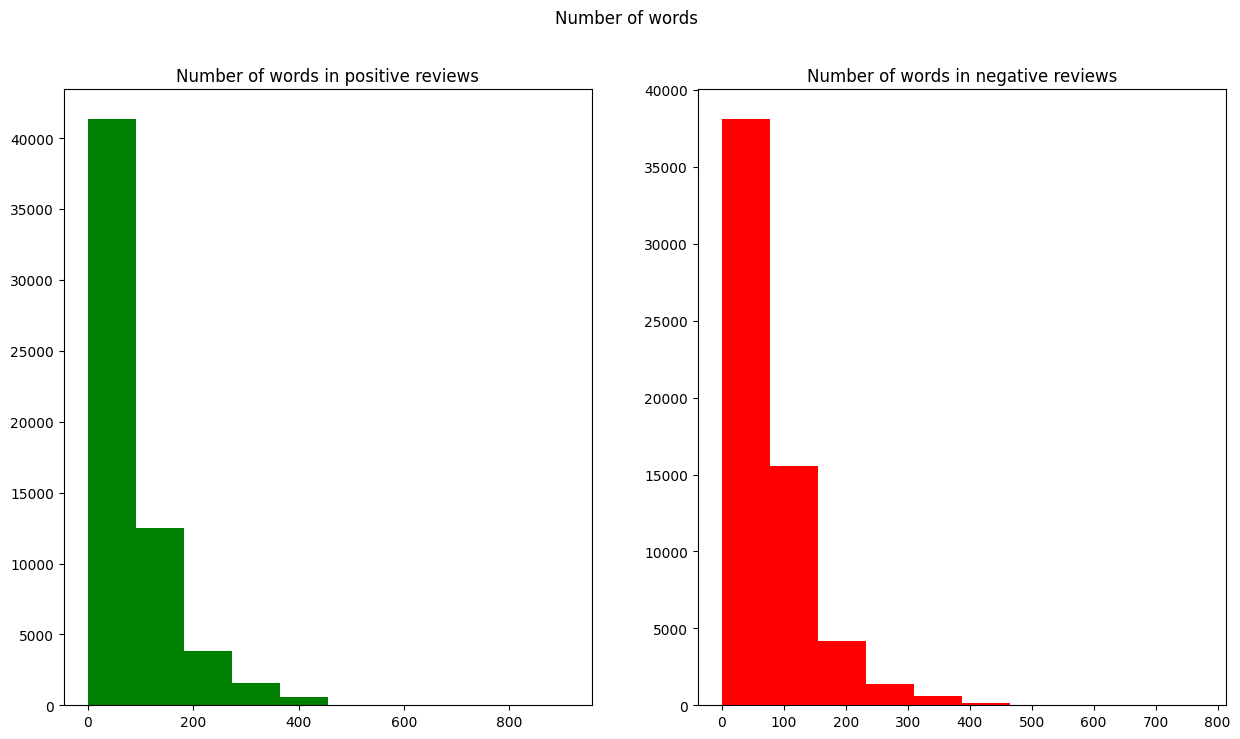

In [ ]:
#visualization of number of words in reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
pos_word=df[df['Ratings']>=7]['Reviews'].str.split().map(lambda review:len(review))
pos_ax.hist(pos_word,color='green')
pos_ax.set_title('Number of words in positive reviews')
neg_word=df[df['Ratings']<=4]['Reviews'].str.split().map(lambda review:len(review))
neg_ax.hist(neg_word,color='red')
neg_ax.set_title('Number of words in negative reviews')
figure.suptitle('Number of words')
plt.show()

Text(0.5, 0.98, 'Average word length in reviews')

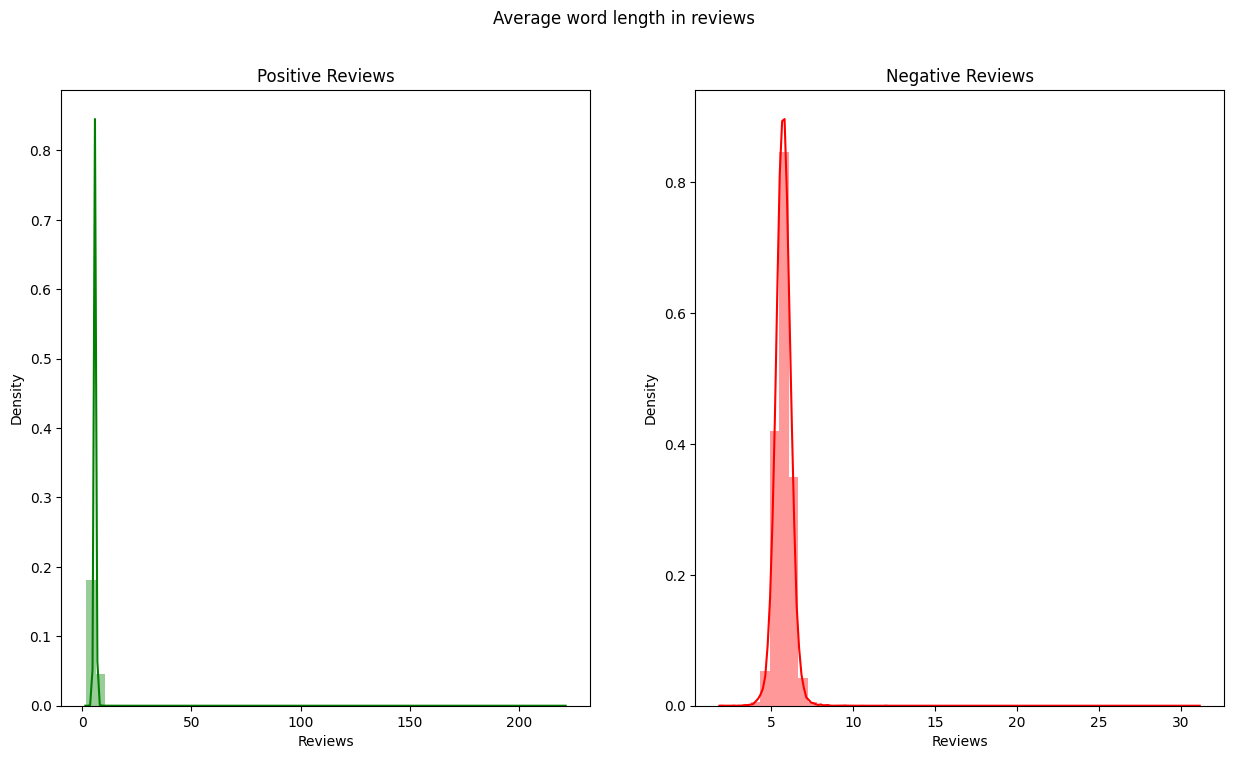

In [ ]:
#visualizing average number of words in reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
pos_word=df[df['Ratings']>=7]['Reviews'].str.split().apply(lambda x:[len(i) for i in x])
sns.distplot(pos_word.map(lambda x:np.mean(x)),ax=pos_ax,color='green')
pos_ax.set_title('Positive Reviews')
neg_word=df[df['Ratings']<=4]['Reviews'].str.split().apply(lambda x:[len(i) for i in x])
sns.distplot(neg_word.map(lambda x:np.mean(x)),ax=neg_ax,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Average word length in reviews')

In [ ]:
#Get important feature by using Countvectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Positive Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,2)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon bigram in Positive Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,3)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon trigram in Positive Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']>=7)&(df['Reviews'].str.contains("not like| not want| not big fan"))].head(30)

,Reviews,Ratings,Movies
90015,honest not watch initially bad reviews professional yesterday got dvd thought not watch least really enjoyed fist minutes decided watch entire honest not bad reviews not know reviewers not like anyhow lets talk story fine screenplay dialogues situations laughed almost every saif role mental guy stole show ram kapoor roles felt ritesh not get excellent lines deliver got movies like masti girls small roles nothing much wonder made serious actor like bipasha type anyhow feel sajid khan good people watch reviewers not taste like humshakals better story gags compared sajid previous enjoy good,7.0,Humshakals
90024,years director james nguyen infamous shock swept popular least attempt emulate films like hitchcock whilst delivering contrived environmental became icon word films become unintentionally entertaining bizarrely poor robotic laughable production values special almost painful almost literally perfect storm yet heard nguyen working became hyped see trademark awfulness plagued nguyen realized first become clear james nguyen understood appeal related unintentionally goofy quickly understood follow likely going trying going make intentional effort silly poor almost never usually not trying hard gave happy report despite nature obvious still deliver chuckles first not often not follow group four primarily focusing bill hollywood director trying make big comeback second failed live heights first financial help rod nathalie two returning characters original able move forward dream soon meets gloria attractive waitress struggling smitten casting lead roll finally consummating romantic rod wh...,7.0,Birdemic 2: The Resurrection
90041,stars bill rich written directed jason digress critiqued video vhs elves starred dan haggerty santa vs nazi xmas every christmas till tape given us new viewing tradition next annual ritual not want spoilers krampus along demon actually well told script cop naughty list grew lots violence cool oxymoron statement winter equals snow locale adds lots look makings cult build better poster maybe push great,7.0,Krampus: The Christmas Devil
90057,backwoods horrors explores something mere murder creepy grand matriarch motley band misfits metaphysical mojo yin making powerplay float wooded naked expanse unrelenting sun shining every hidden corner psyche incisive intensity dark moon threatens swallow three first pared using sharp edge fears layer innermost gooooood uses smoldering burn build existential horror flurried sights dissonant sounds la lars von trier certainly not masterful von encouraging refreshing feature given use anglicized version carl jung name main also reminiscent jesse holland andy mitton depiction spooky forest pulling double duty vast jungian jungle collective unconscious mythic archetypes collective psyche must fought fled intelligent person horror rather boring formulism typifies vast majority today additions critiques old woman fairly certain audience meant able often point inaudible dialogue verbiage characters sounds little pedestrian lacking incongruent contextual gravity scenes originality departur...,7.0,The Taking
90058,rapsittie street believe santa definitely hard animation music story times taken plot characters fun well strange animation works create fascinating resounding message found believe not exactly approach perspective experience uniquely comforting cgi rapsittie street kids understood primarily feeling anything like dream hard say anything largely going details seems bit like missing supposed grandmother talks bullies toilet junkyard point breaking either enjoy cohesive whole not like enjoy quiet cg bound may join ranks hecklers found another reason appreciate either worth visit rapsittie street kids ville,7.0,Rapsittie Street Kids: Believe in Santa
90074,famous director horror b movies must back certainly subtract four marks not like ed wood story idea fine takes undead arrive regular robin editing disjointed places toward photography good l

In [ ]:
 most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,4)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon fourgram in Positive Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,5)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon fivegram in Positive Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']<=4)&(df['Reviews'].str.contains("blah blah blah| la la la la| mario mario mario mario"))].head(100)

,Reviews,Ratings,Movies
571,well not sure language made put babel typical line blah blah blah blah de actually makes sense lines actors wise spotted left props voyage bottom sea giant squids fish line cigar smoking middle aged man year world become place boys like grow looks least god makes previous syfy effort planet alien killer look like going guys,1.0,War of the Worlds 2: The Next Wave
1070,worst even call not not kind guy bashes kids making usually actually good work done maybe voices not watch videos immediately hate infamous maker plays not care personal life want need tell got subscribed tube months not deserve not mind actor let fred video blah blah blah blah judy ha not funny blah blah blah pointless yelling wow look kevin blah blah blah mom comes home says something blah blah person wasted time gave partial deafness high pitching easily done audacity original audio replaced worst videos clear effort thinks daily situations really cares acts annoying stupid high pitched guarantee regret watching nobody ever met likes,1.0,Fred
4538,forget without doubt worst ever incredibly dull bad bad annoying narration lack narration parts need stupid couples never learned idiot military cant figure shoot unexplained sub everything wrong even watching nearly going watch use mike starts stock footage space shuttle lifting playing couple cop decide blah blah blah monster eats blah blah blah monster avoid means,1.0,The Creeping Terror
7699,hmmmm ok lets start good female acting ann henson annoyed hell attractive phone sex scene pretty know whole beginning not know hell going pretty easily identifiable course broke middle nowhere blah blah blah ill get descriptive part not show killings directors attempt add story twists poorly course even planted somehow became part lead characters got away somehow fat beaten shot hillbilly cannibal gets destination end oh not done crazy little goats cabin discovered bunch letters signed crazy hillbilly guy twist planted similar scenario also discovered bit pregnant hag tied bed signifying crazy cannibal uses breed sound think rather masturbated fat women porn watch,1.0,Alive or Dead
9997,title bomb says disappointing totally derivative soporific supposed story ghost child living limbo blah blah blah used abused much better films need fast cash probably decided work story dull lacking director resort loud noises tell audiences something supposedly interesting wake audiences pretty boring attempt making supernatural absurd see people waste time money talent try tell story absolutely nothing way make like mildly entertaining add gratuitous sex scenes showing mrs beckinsale sex husband anything like director writers not even think nothing typical fare lifetime hallmark horror story,1.0,The Disappointments Room
12878,watched minutes ago unclear like roland earthquake much different two scientists trying save city los angeles magnitude blah blah elsewhere teenage characters stupid annoying accident caused earthquake blah blah blah see ridiculous character lousy acting pretty cgi bad added crummy poster similar,1.0,10.0 Earthquake
16436,wow forget old friends like bundy hitler never lived see let overlook crime understand people still simpson trial want see fry whatever reason even though know not admit accused murder nicole simpson angel ever heard tragic truth horrible caught attention suvari two actresses admire reviews claiming behind production etc blah blah blah obviously still triggered years,2.0,The Murder of Nicole Brown Simpson
18394,science comes guy loves mediocrely line created new bar ice bergs writer actually seems believe ice bergs pop nowhere florida another operates premise florida center actually shots good looking girls may well not well nothing save acting effects blah blah blah want see something go see day,2.0,Absolute Zero
18623,happened watched despite still want get money zombie virus breaks spend seems next eternity watching misfit band college students get chased around night liv

In [ ]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon unigram in Negative Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],20,2)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon bigram in Negative Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],50,3)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon trigram in Negative Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],50,4)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 4-gram in Negative Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],50,5)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 5-gram in Negative Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']<=4)&(df['Reviews_clean'].str.contains("good|great"))].head(100)

,Reviews,Ratings,Movies
3,saw previous spoof movies two horrible know already tell want watch brainless person meant stereotypical laugh judge even automatically never ask comes two good old hollywood days whenever making showing people type also story kept edge well whenever word hit making films earned loads greedy people came picture quite two still artists notably genius christopher two guys writing big let put simple terms guys not instead money craving latest proves even fails easily mind mean nothing funny people usually put best stuff idiots knew going made bet not good idea write reviews paper tell everyone whats good whats flipped review well warning not even called nothing artistic references made throughout pretty much like hannah montana juno gig actually close spoofing failed referencing instead joking twisting random wrestling not know high respect high respect know not something not add story nudity not really needed closest still gotten idea saw bare hate girl says guys perverts brainless d...,1.0,Disaster Movie
6,given free ticket not complain ripped minutes life irretrievably stolen sort movies epic meet not funny time reached new not real laugh anywhere alleged actually considerable amount stuff form especially garbage along ample helpings juvenile none actors even bothering put pretense nothing even mildly intelligent going entire beginning end utterly humorless human know past sort trash made enough money keep seltzer et grinding may downfall utter contempt seltzer collaborators audience finally beginning show fails saw almost empty theater good chance seltzer go back drawing stop making lazy finally develop real sense unfunny piece puke stay away,1.0,Disaster Movie
7,not imaginative barb not shred wit saw friend said trailer free think spoof disaster movies not couple disaster movies get not really recent movies aspects current current women wrestling anything minute running time get nicole parker seems like good,1.0,Disaster Movie
11,decided go see hoping bad become cant take kid confirmed jb ego even bigger kayne entire talented singer good simply nothing not forgot mention mommies fat cigar smoking managers made make look buried starting think done purpose fat cats want get rid not,1.0,Justin Bieber: Never Say Never
12,right everyone imdb pretty much committed giving call get bottom trust went see knew way criticize without seeing lacks artistic merit full latest greatest pop sensations youtube names flashy lights stuffing cooked turkey heart presentation message never give however whole bieber looking pretty grooming lesbian mentioned previous theater full tween girls screaming heads every time inhaled someone really needs teach modern generation cinema least tell shut honestly not know trying besides earn money add accolades stars short also,1.0,Justin Bieber: Never Say Never
...,...,...,...
287,back folks went create pixar brought first short wally use cgi amazing day led great least fox came looked pretty similar cgi quality wally cgi improved exponentially films like new fox looks decades old incredibly cheap ugly cheapness ugliness fox exactly ended imdb old bottom lowest rated films criteria list recently films required least votes make fox currently years tried find trying see many old bottom recently come better late perhaps despite dated worth main problem cgi ugly watching real ugly short bad case minutes ugly stick figures sock puppets looked add insipid story terrible humans move like recipe kids well ever bought copy use punishment kids ugliest worthless cgi ever tough standard pure ugliness awfulness low films like also making old bottom suffice say bad worthless every possible abysmal mess bad see believe score simply imdb not allow good computer animation came,1.0,A Fox's Tale
288,not believe watching nothing good acting horrible direction poor not waste time,1.0,The Rat
298,worst ever nothing good see waste time,1.0,The Rat
299,waist time money not understand writer hed want exactly 

In [ ]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']<=4)&(df['Reviews_clean'].str.contains("saturday night friday"))].head(100)

,Reviews,Ratings,Movies
7055,star saturday night friday night friday morning sunday night monday morning stars end days made tv biopic pop icon britney spears starting breakthrough single baby time shoved limelight pushy mother lynne domineering manager larry rudolph naively thought old mature enough handle massive media exposure pushed lie virginity keep trials turbulence relationships justin timberlake kevin federline revealing documentary something give really bad yet still feel utterly compelled see instinct tell looks really see end bad almost write review even seen still still interested subject matter see never massive fan something britney spears always captivated kept icon popular culture never gotten feeling comfortable dramatisation inevitable never something thought happy definitely case popular name big studio quite willingly thrown clout behind production budget monstrosity even existence ripe little budget must terrible production values evidence opening like crashing plane whirling becomes even...,1.0,Britney Ever After
17427,star saturday night friday night friday morning sunday night monday morningwill new guy high stands prime target soon makes friends jay simon neil three social misfits not complete dorks far coolest kids always spurs brit something home grown becomes imagine probably anyone small country not centre world sad thing sign times way tell massive success americans go remake almost whole lot best way describe inbetweeners usa imagine read really great stephen king see adaptation like really everything already seen british done american actors not even half bloody cultural slang becomes evident painful showcases insincere mess whole thing add insult performers not even look like british counter overweight hippie like neil simon resembling jonas not even respect source material biggest type rather drive mondeo definitely imagine different,2.0,The Inbetweeners
17818,star saturday night friday night friday morning sunday night monday morning premise behind abysmal action thriller group people going good old bit paint find really fighting stay alive barrage real bullets fired characters never developed explored impossible care needless air tension suspense acting bad none life though running around shouting screaming incoherently gives not anything special see usual generic stereotypes typical yet another not learned modern trend shaking camera around darkening lens putting annoying rather endearing flee,2.0,Paintball
18138,star saturday night friday night friday morning sunday night monday morning go great pains write depth review last hard write much summary right opening lead characters wondering around deserted london shouting like aforementioned feels like pale imitation almost director knew practically copying scene scene gave bothering tell sort decent story goes motions post apocalyptic thriller usual set without firmly establishing back story behind majority humanity wiped making baffling danny dyer role sort blood crazed zombie type probably mysterious thing whole uninspired,2.0,The Last Seven
18458,star saturday night friday night friday morning sunday night monday morning send taken middle aged irish hero come world working everything around daughter seems going albanian gangsters hatch plot put explosive devices local including beloved pushed far swears bring bigger fan taken franchise ultra low budget misfire sending able relate little enjoyed maybe little big begs retrospective script potential first bigger studio not snap pulls gross juvenile stops never seen anything unfunny quite messy plot makes even harder script better better finance behind even title,2.0,Tooken
19186,star saturday night friday night friday morning sunday night monday morning late man mysteriously murders closest finds merely uttered name murderous present several millennials move begin experience mysterious events freak become aware existence nothe bye bye learn even think say inviting death upon least candyman 